# Load Forecasting

> Load forecasting is critical for planning and operating electrical systems efficiently. It involves predicting future electricity demand based on historical consumption data.

- Statistical Techniques: Time series analysis, forecasting models, and moving averages.
- Python Implementation:<br>
        - Use pandas for handling time series data.<br>
        - Use statsmodels for ARIMA or SARIMA models.

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('weekly pre-dispatch forecast.csv', index_col='datetime', parse_dates=True)

In [3]:
data.describe()

,load
count,40152.000000
mean,1207.929346
std,195.240605
min,0.000000
25%,1046.600000
50%,1197.750000
75%,1349.800000
max,1760.400000


In [4]:
model = ARIMA(data['load'], order=(5, 1, 0))

c:\Users\win11\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\win11\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\win11\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [5]:
model_fit = model.fit()

In [6]:
forecast_results = model_fit.get_forecast(steps=24)

In [7]:
print(forecast_results)

In [8]:
forecast = forecast_results.predicted_mean
conf_int = forecast_results.conf_int()

In [13]:
forecast_index = pd.date_range(start=data.index[-1], periods=24 + 1, freq='D')[1:]

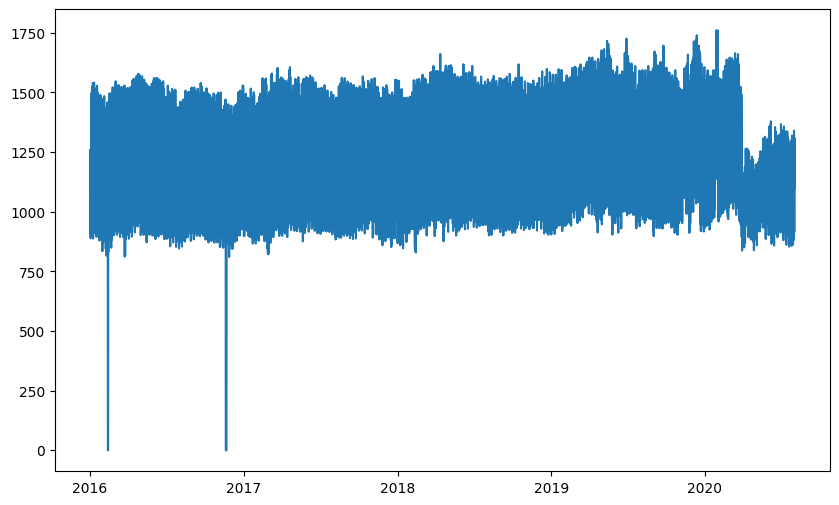

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['load'], label='Historical Load')

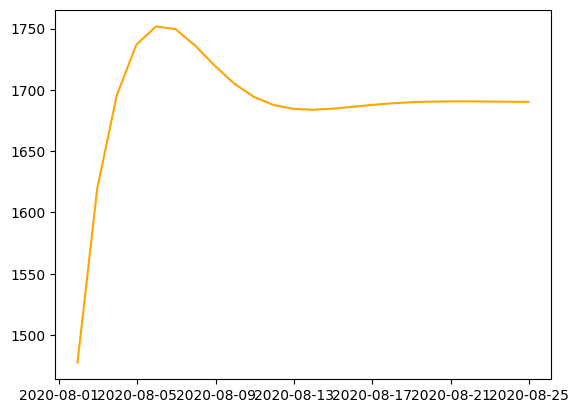

In [15]:
plt.plot(forecast_index, forecast, label='Forecast', color='orange')

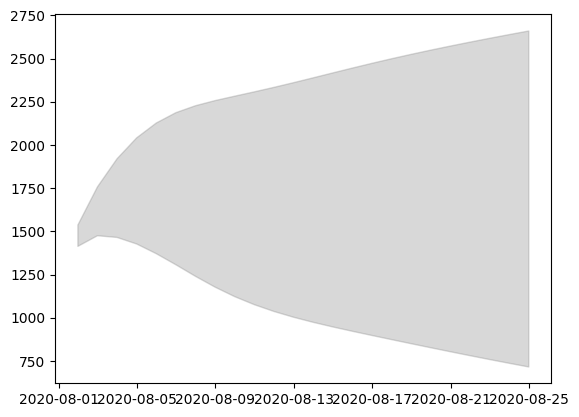

In [16]:
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

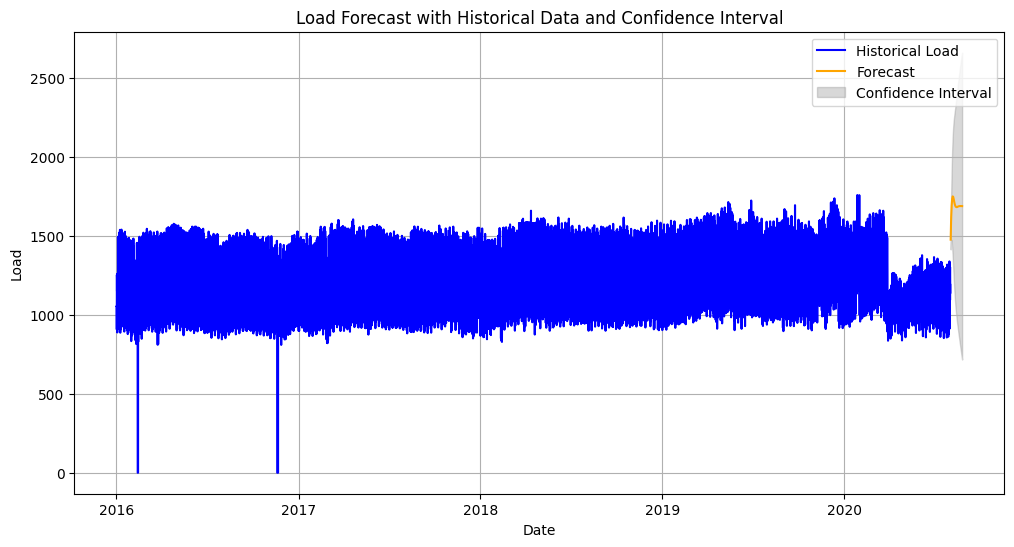

In [27]:

# Plot the historical data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['load'], label='Historical Load', color='blue')

plt.plot(forecast_index, forecast, label='Forecast', color='orange')

plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Load')
plt.title('Load Forecast with Historical Data and Confidence Interval')

plt.legend()
plt.grid(True)
plt.show()